In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Gachon/Desktop/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
  # display!

        break  # we just want one for now so break
    break 

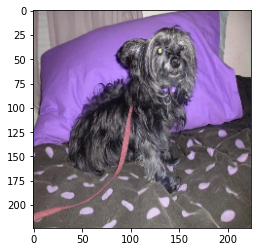

In [2]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

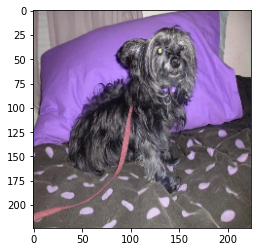

In [3]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

 85%|████████████████████████████████████████████████████████████████▊           | 10656/12501 [02:40<00:25, 73.07it/s]

In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
0
0
1
0


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[ 34  39  40]
   [ 35  40  41]
   [ 33  41  41]
   ...
   [ 30  35  33]
   [ 29  37  38]
   [ 40  52  52]]

  [[ 31  36  37]
   [ 31  36  37]
   [ 34  42  42]
   ...
   [ 41  54  55]
   [ 38  54  60]
   [ 42  57  63]]

  [[ 34  42  42]
   [ 35  43  43]
   [ 35  43  43]
   ...
   [ 41  59  66]
   [ 41  59  66]
   [ 42  61  69]]

  ...

  [[ 87 109 113]
   [103 117 113]
   [ 78  97  98]
   ...
   [141 143 143]
   [164 160 161]
   [169 163 164]]

  [[ 47  53  60]
   [ 97 111 107]
   [ 76  94  93]
   ...
   [158 153 154]
   [157 152 153]
   [162 156 157]]

  [[ 45  56  62]
   [ 93 104 101]
   [ 68  85  84]
   ...
   [150 145 146]
   [150 145 146]
   [155 149 150]]]]


In [8]:
import pickle

pickle_out = open("X.pickle3","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle3","wb")
pickle.dump(y, pickle_out)
pickle_out.close()